In [1]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
from matplotlib import animation
from JSAnimation.IPython_display import display_animation
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
L = 20
nx = 81
dx = 0.25
dt = 0.0002   
gamma = 1.4

In [3]:
x = numpy.linspace(0,L,nx)
u = numpy.ones(nx)

In [4]:
rho0 = numpy.ones(nx)
rho0[40:81] = 0.125

u0 = numpy.zeros(nx)

P0 = numpy.ones(nx) * 100000
P0[40:81] = 10000

In [5]:
x = x - 10

In [6]:
u = numpy.ones((3,nx))

In [7]:
u [0] = rho0.copy()
u [1] = (rho0 * u0).copy()
u [2] = (rho0*(P0/(gamma-1)/rho0+1/2*u0**2)).copy()

In [8]:
def computef1(u2):
    
    return u2
    

In [9]:
def computef2(u1, u2, u3, gamma):
    
    return u2**2/u1+(gamma-1)*(u3-0.5*u2**2/u1)

In [10]:
def computef3(u1, u2, u3, gamma):
    
    return (u3+(gamma-1)*(u3-0.5*u2**2/u1))*u2/u1

In [11]:
def maccormack(u, nt, dt, dx, gamma):
    
    u1 = (u[0]).copy()
    u2 = (u[1]).copy()
    u3 = (u[2]).copy()
    
    u1_n = numpy.zeros((nt,81))
    u1_star = numpy.empty_like(81)
    u1_n[:,:] = u1.copy()
    u1_star = u1.copy()
    
    u2_n = numpy.zeros((nt,81))
    u2_star = numpy.empty_like(81)
    u2_n[:,:] = u2.copy()
    u2_star = u2.copy()
    
    u3_n = numpy.zeros((nt,81))
    u3_star = numpy.empty_like(81)
    u3_n[:,:] = u3.copy()
    u3_star = u3.copy()
    
    for t in range(1,nt):
        f1 = computef1(u2)
        f2 = computef2(u1,u2,u3,gamma)
        f3 = computef3(u1,u2,u3,gamma)
        
        u1_star[:-1] = 1/2*(u1[1:]+u1[:-1]) - dt/2/dx * (f1[1:]-f1[:-1])
        u2_star[:-1] = 1/2*(u2[1:]+u2[:-1]) - dt/2/dx * (f2[1:]-f2[:-1])
        u3_star[:-1] = 1/2*(u3[1:]+u3[:-1]) - dt/2/dx * (f3[1:]-f3[:-1])
        
        f1star = computef1(u2_star)
        f2star = computef2(u1_star,u2_star,u3_star,gamma)
        f3star = computef3(u1_star,u2_star,u3_star,gamma) 
       
        u1_n[t,1:] = u1[1:] - dt/dx * (f1star[1:] - f1star[:-1])
        u2_n[t,1:] = u2[1:] - dt/dx * (f2star[1:] - f2star[:-1])
        u3_n[t,1:] = u3[1:] - dt/dx * (f3star[1:] - f3star[:-1])
        
        u1 = u1_n[t].copy()
        u2 = u2_n[t].copy()
        u3 = u3_n[t].copy()

    return u1, u2, u3, u1_n, u2_n, u3_n

In [12]:
t = 0.01
nt = int(t/dt+1)

In [14]:
gg = maccormack(u, nt, dt, dx, gamma)

In [16]:
def animate(data):
    x = numpy.linspace(-10,10,nx)
    y = data
    line.set_data(x,y)
    return line,


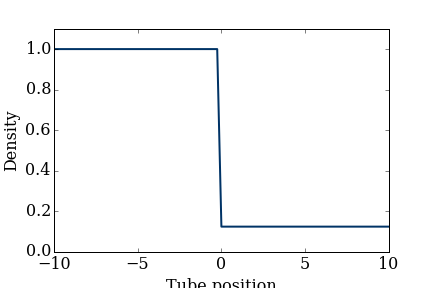
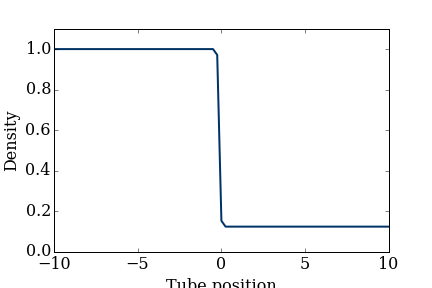
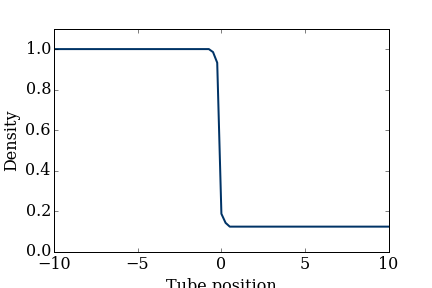
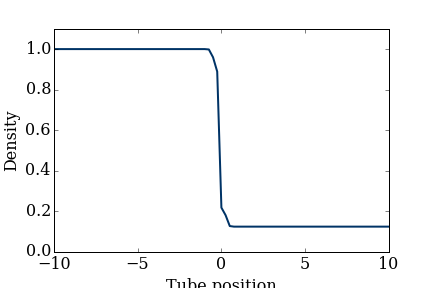
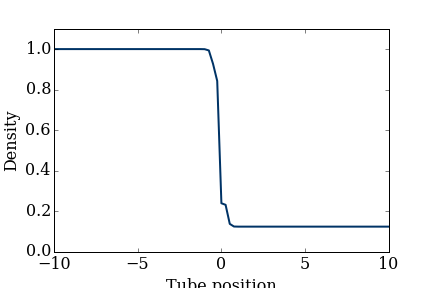
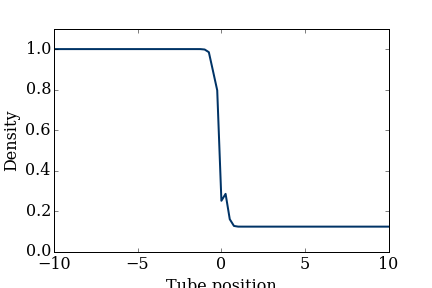
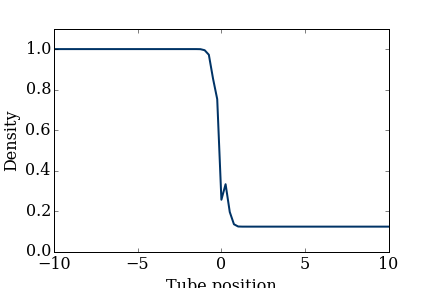
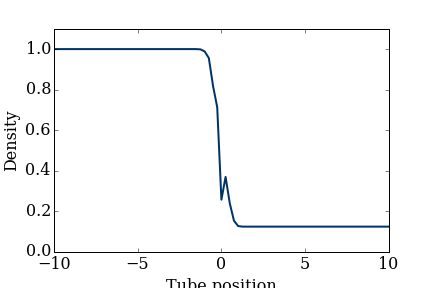
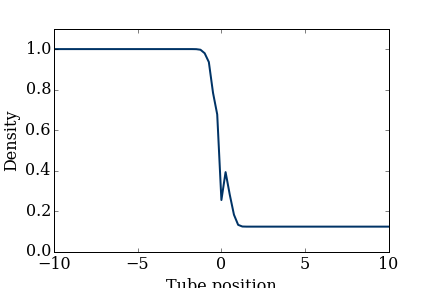
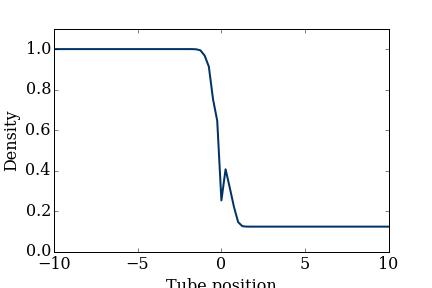
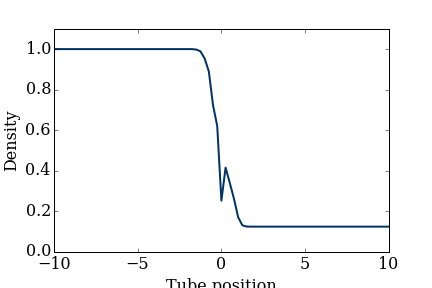
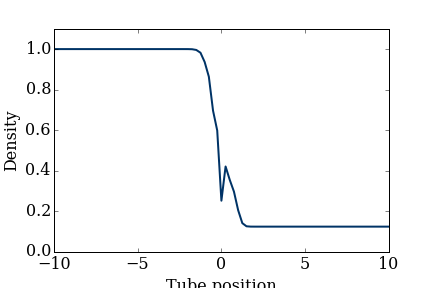
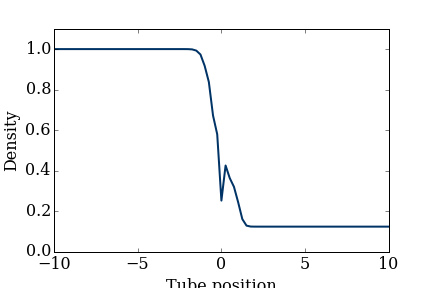
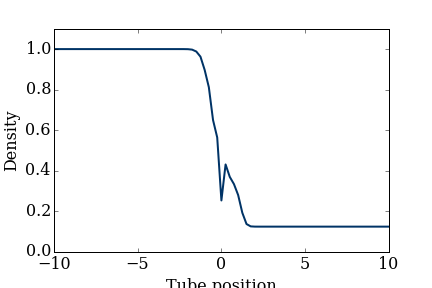
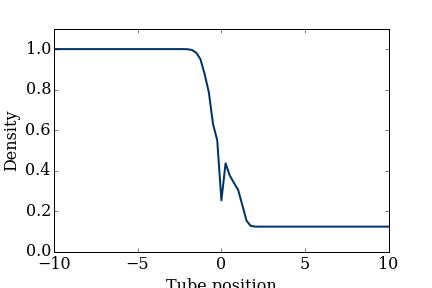
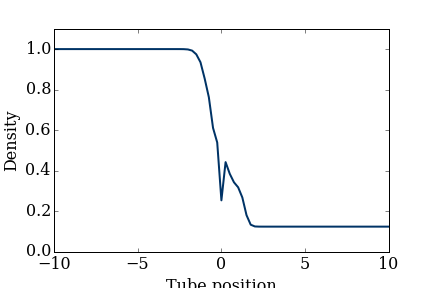
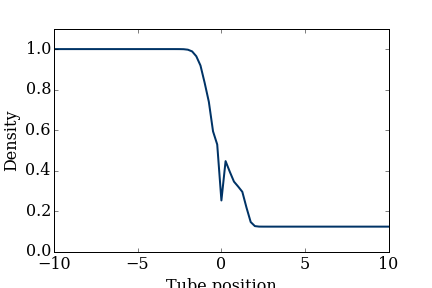
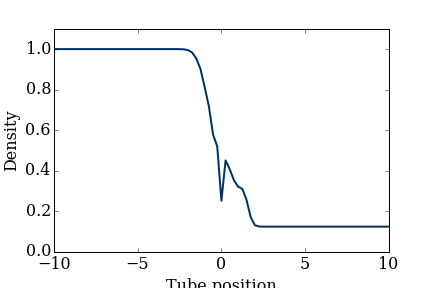
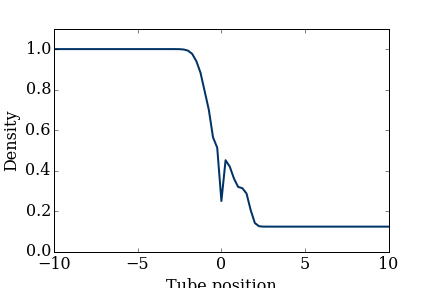
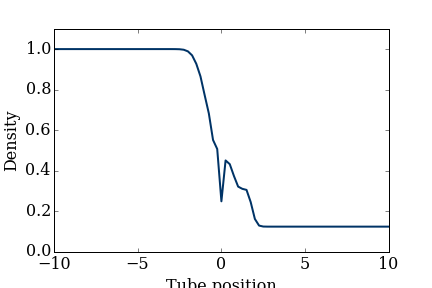
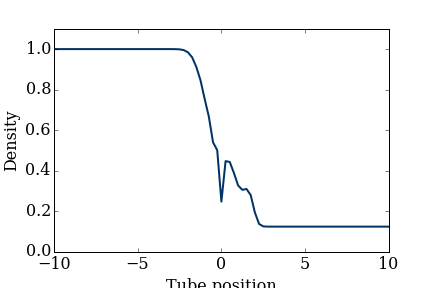
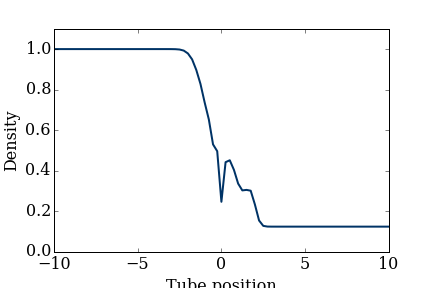
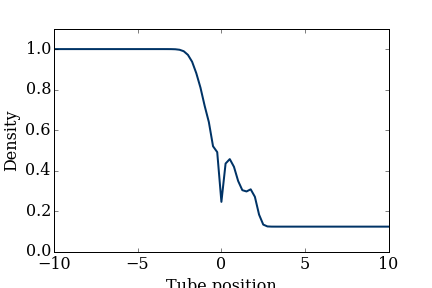
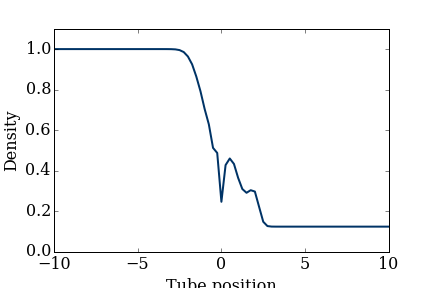
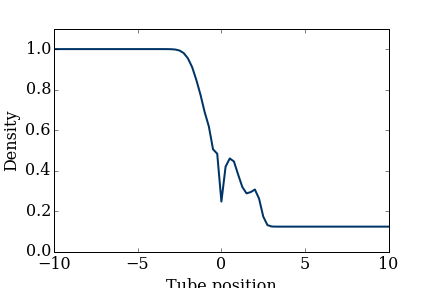
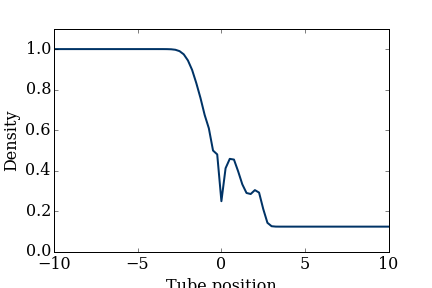
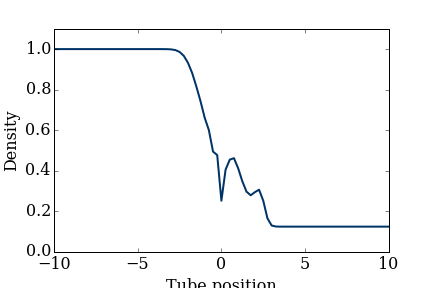
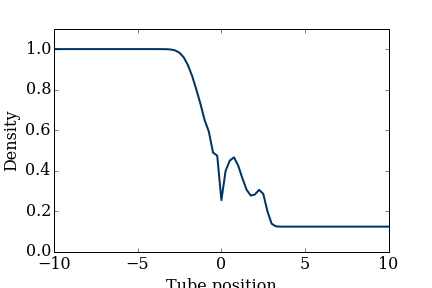
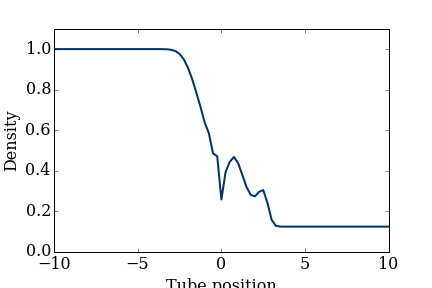
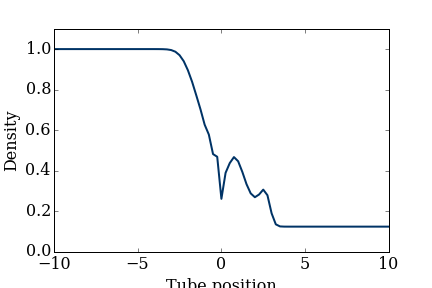
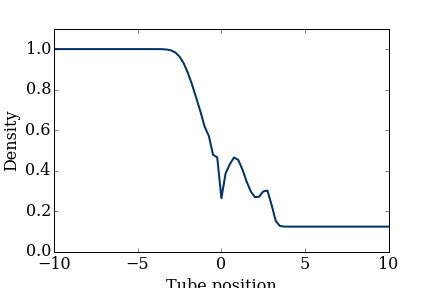
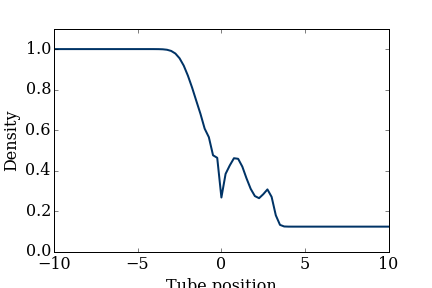
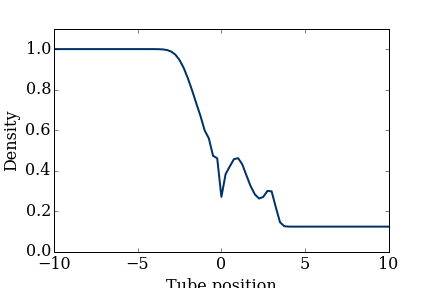
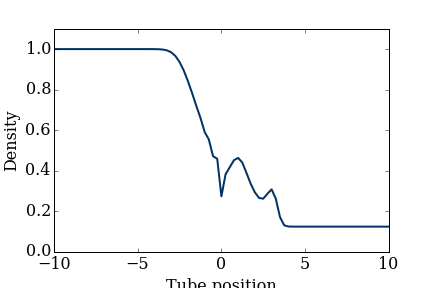
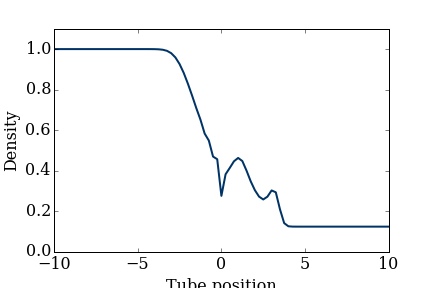
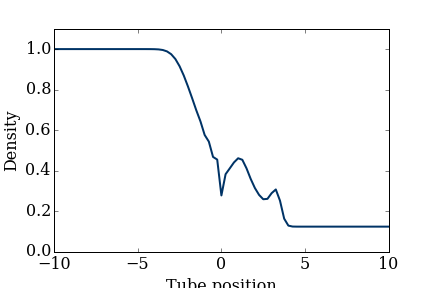
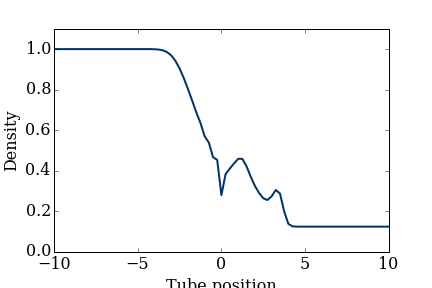
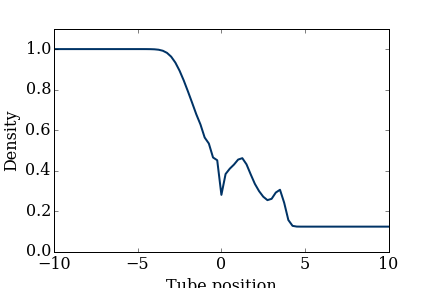
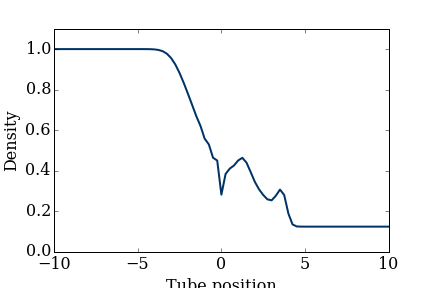
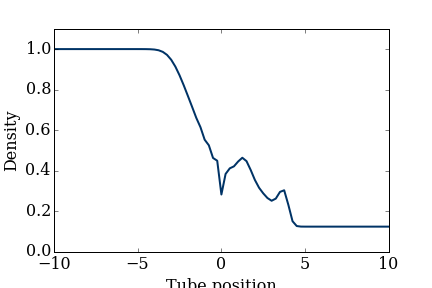
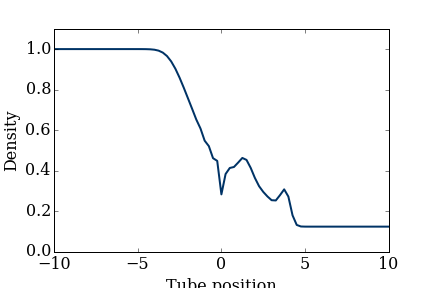
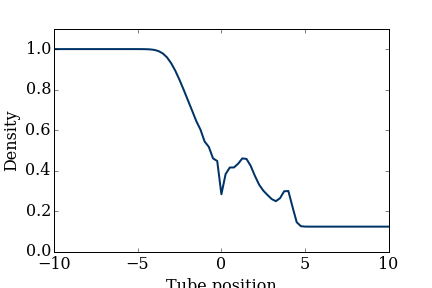
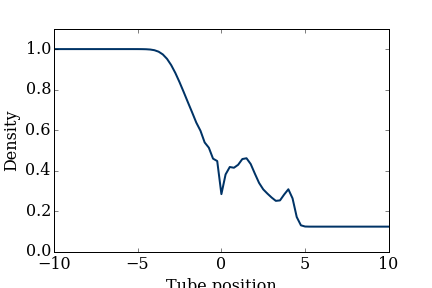
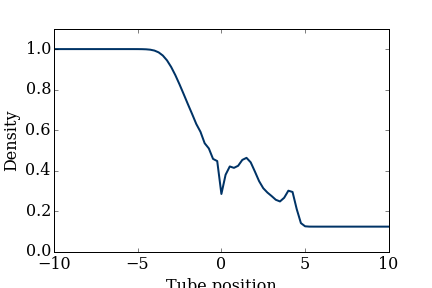
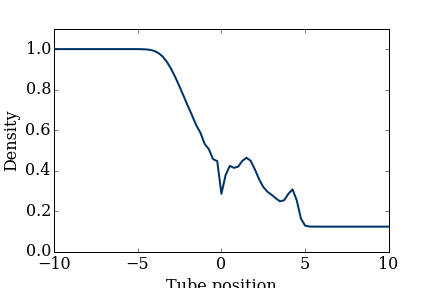
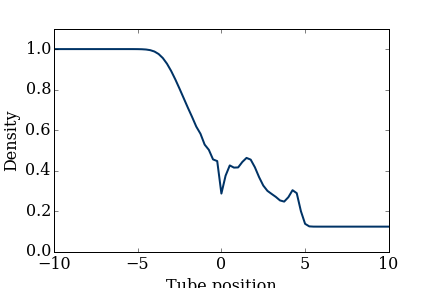
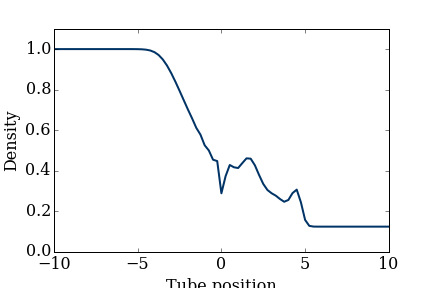
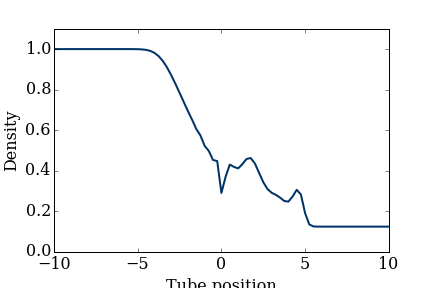
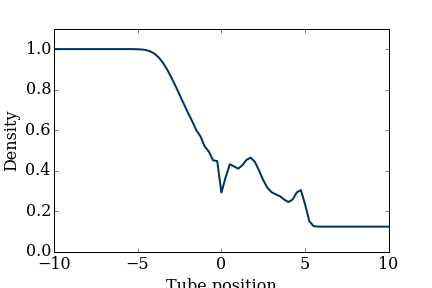
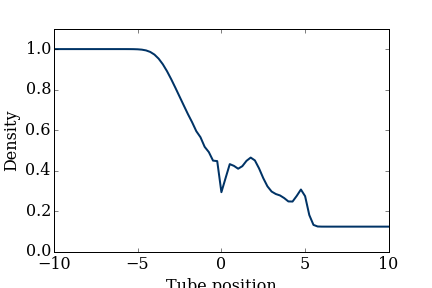
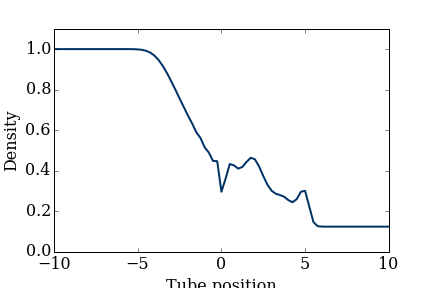

In [17]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(-10,10),ylim=(0,1.1),xlabel=('Tube position'),ylabel=('Density'));
line, = ax.plot([],[],color='#003366', lw=2);

anim = animation.FuncAnimation(fig, animate, frames=gg[3], interval=75)
display_animation(anim, default_mode='once')

In [24]:
print ('The density at x = 2.5 m is {:.2f} kg/m^3.'.format(gg[0][50]))

The density at x = 2.5 m is 0.37 kg/m^3.



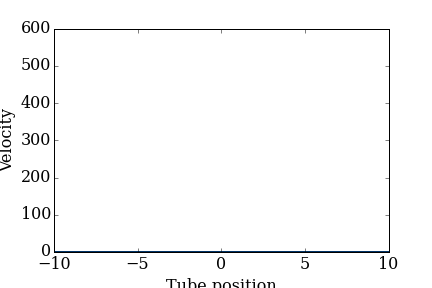
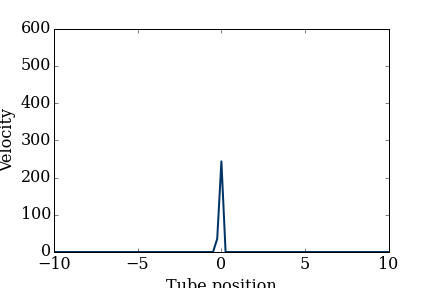
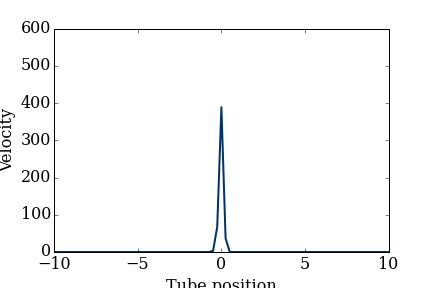
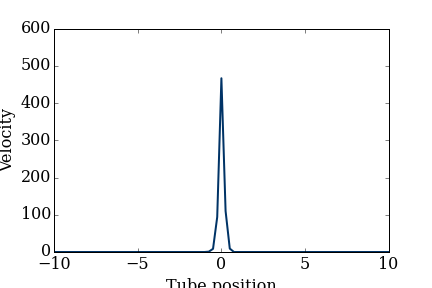
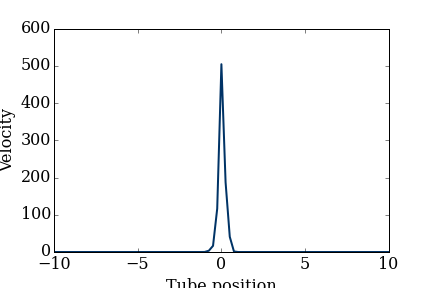
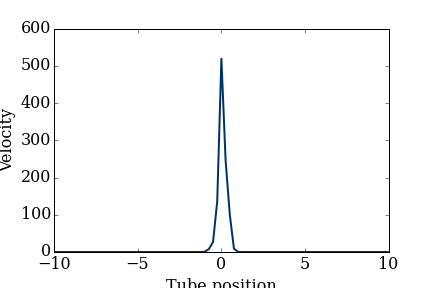
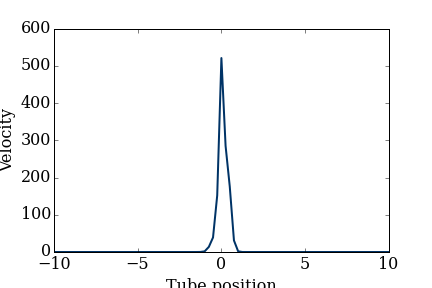
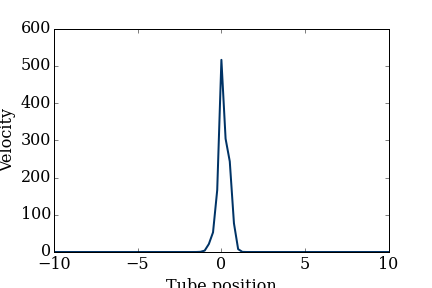
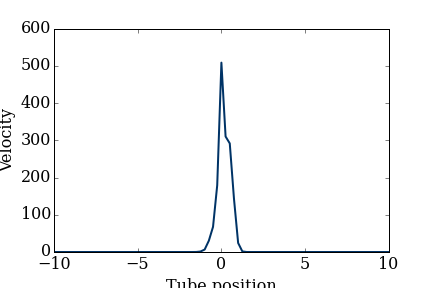
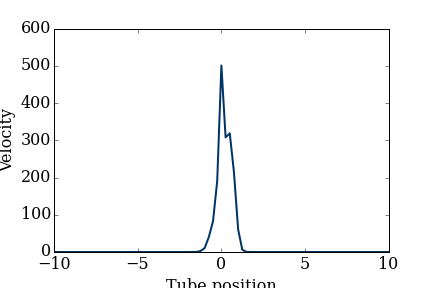
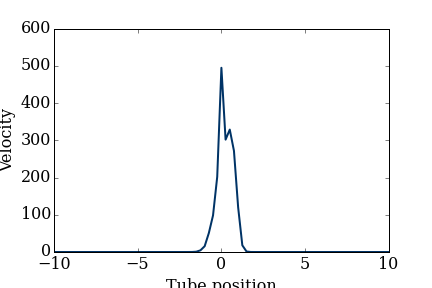
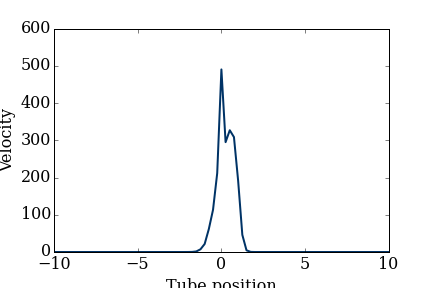
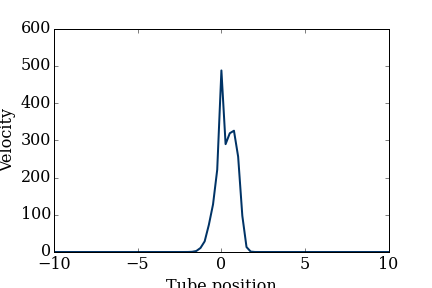
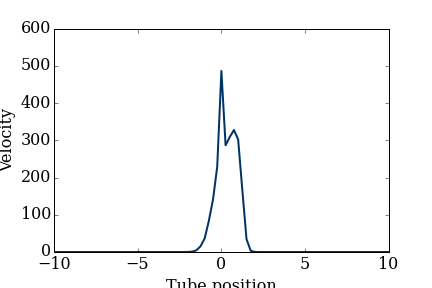
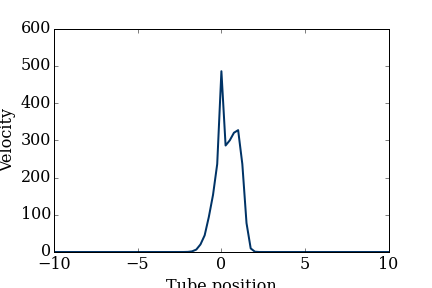
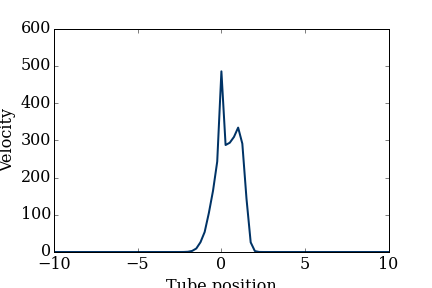
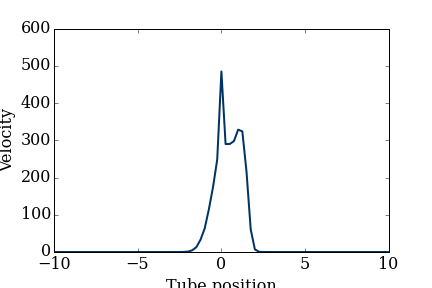
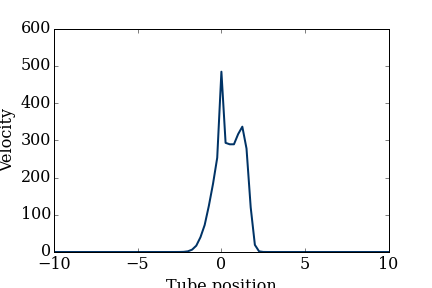
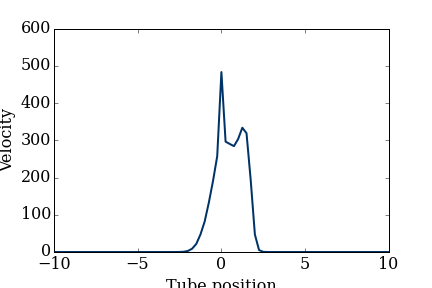
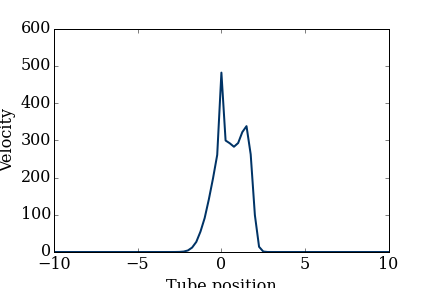
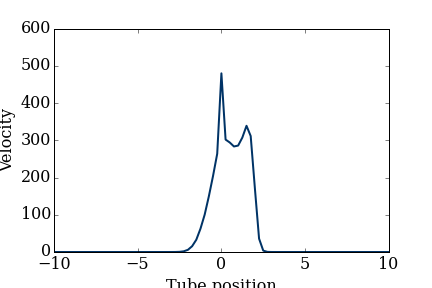
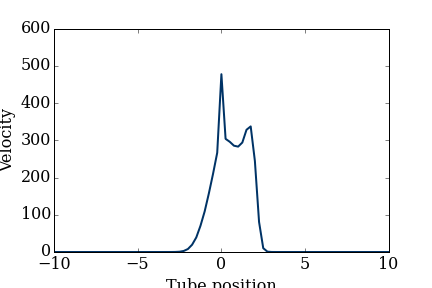
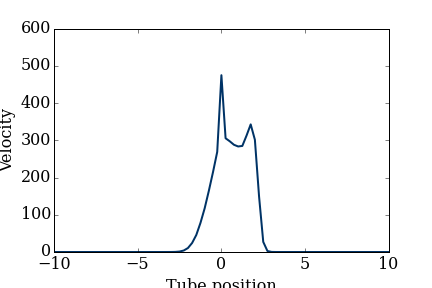
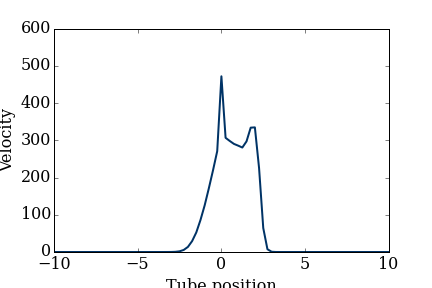
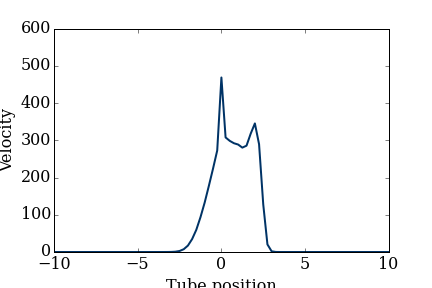
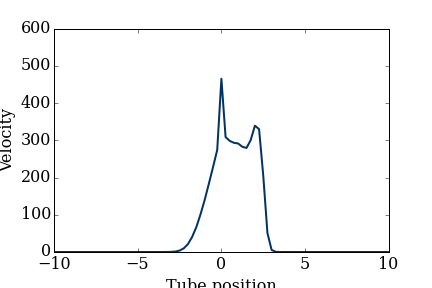
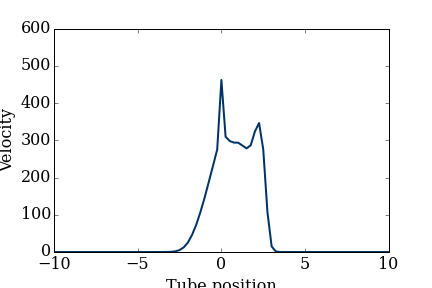
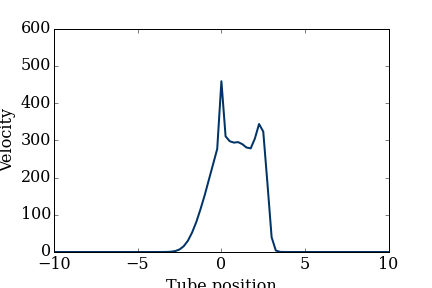
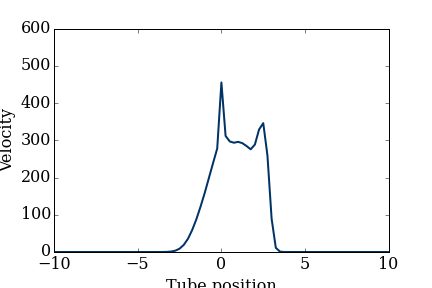
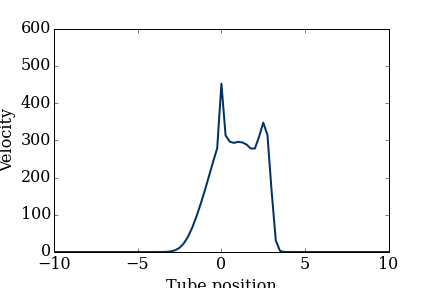
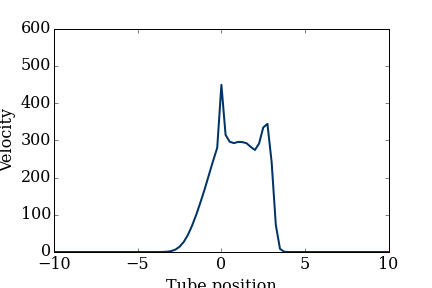
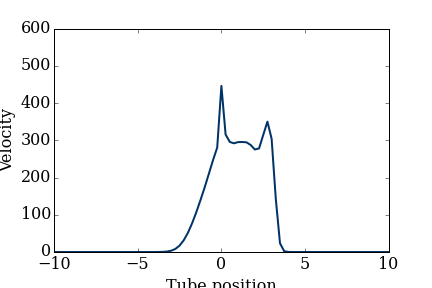
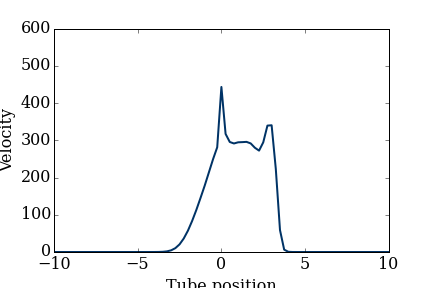
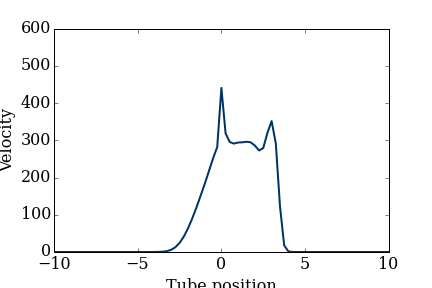
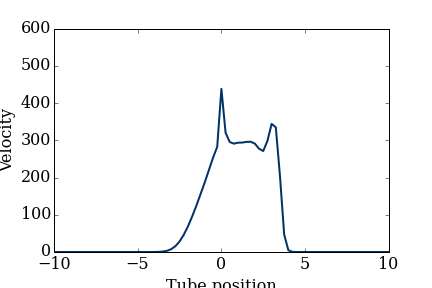
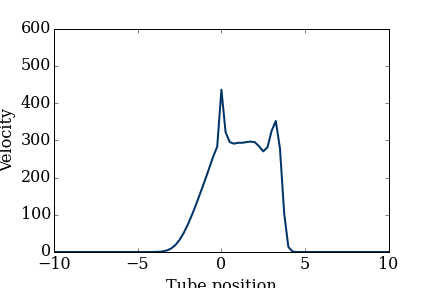
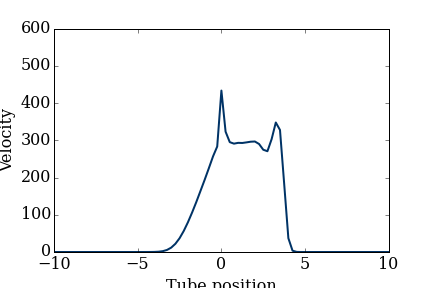
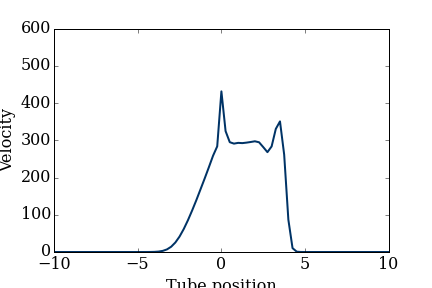
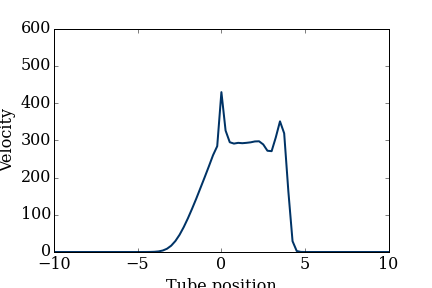
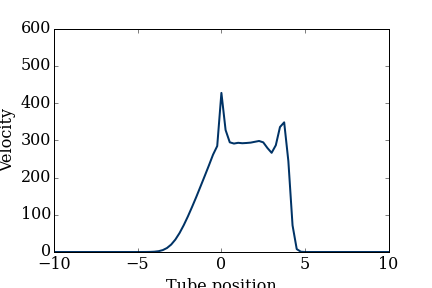
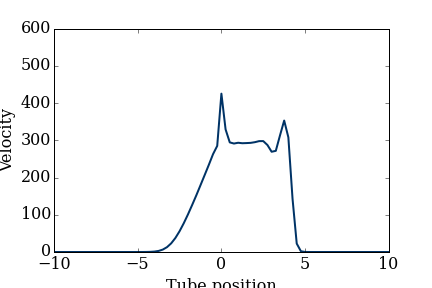
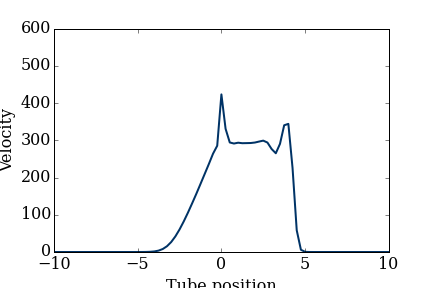
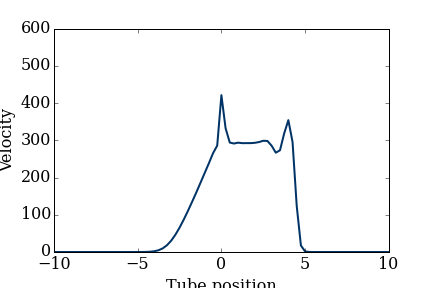
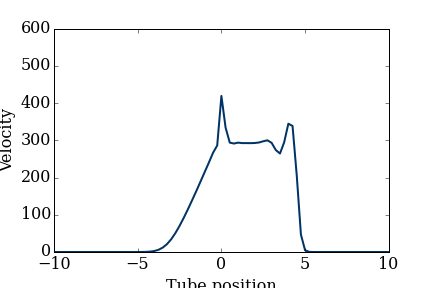
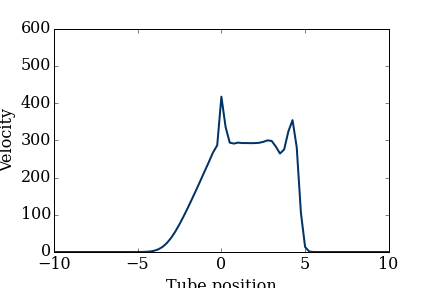
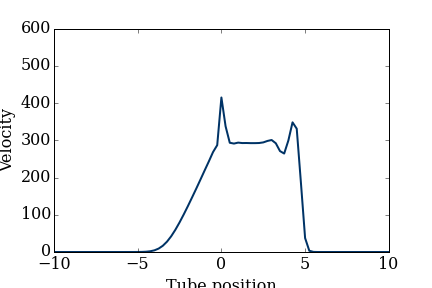
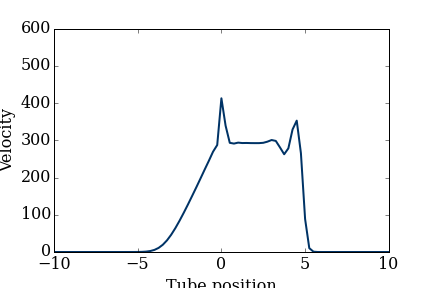
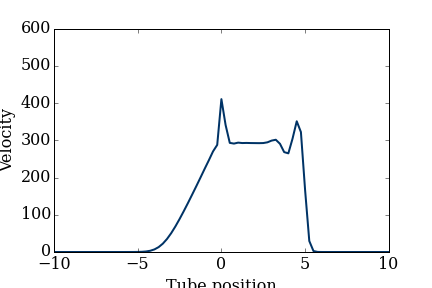
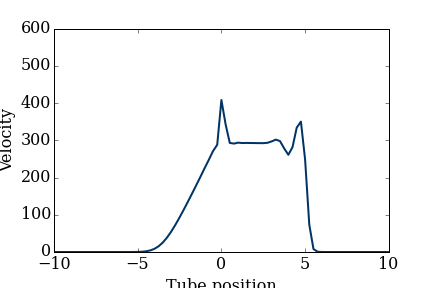
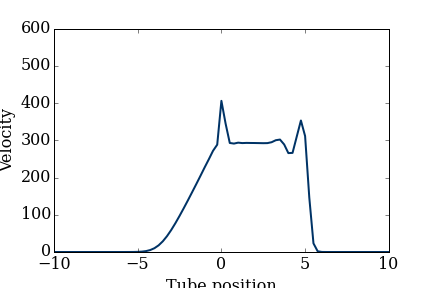
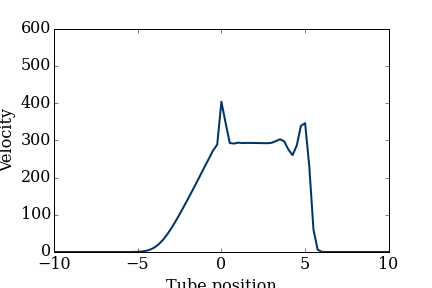

In [21]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(-10,10),ylim=(0,600),xlabel=('Tube position'),ylabel=('Velocity'));
line, = ax.plot([],[],color='#003366', lw=2);

anim = animation.FuncAnimation(fig, animate, frames=gg[4]/gg[3], interval=75)
display_animation(anim, default_mode='once')

In [25]:
print ('The velocity at x = 2.5 m is {:.2f} m/s.'.format(gg[1][50]/gg[0][50]))

The velocity at x = 2.5 m is 292.61 m/s.



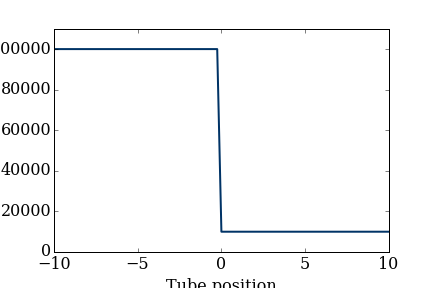
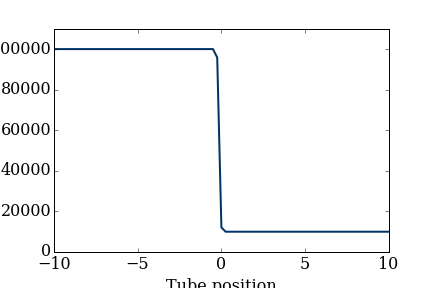
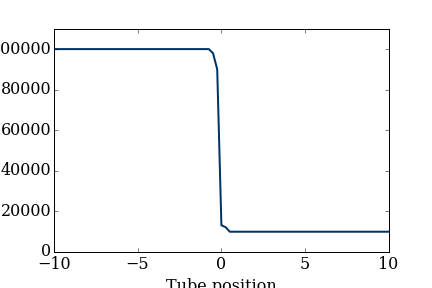
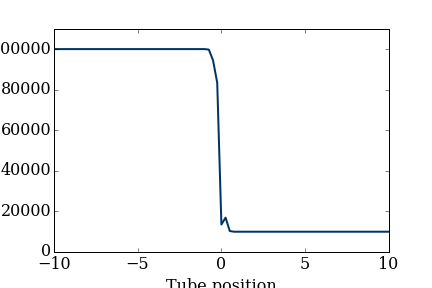
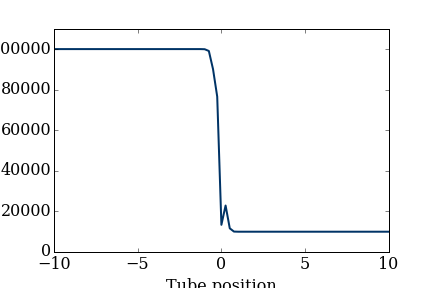
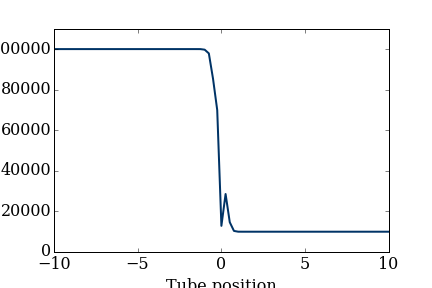
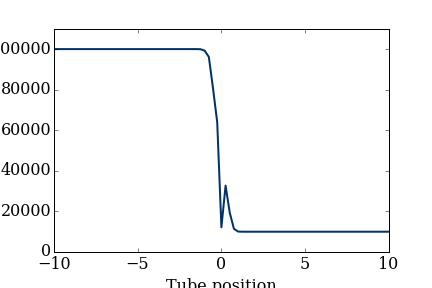
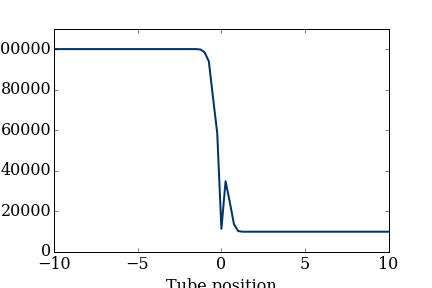
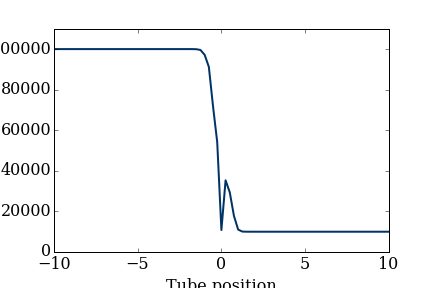
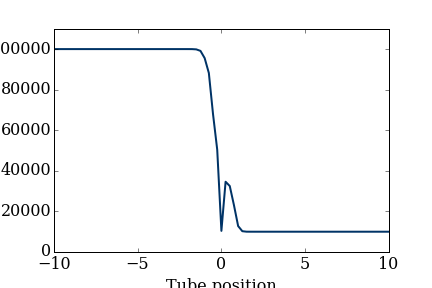
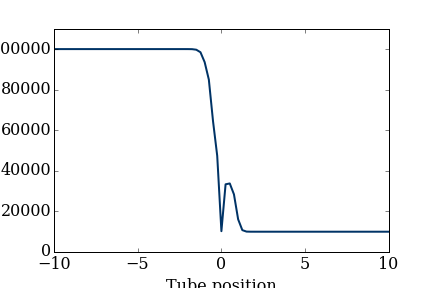
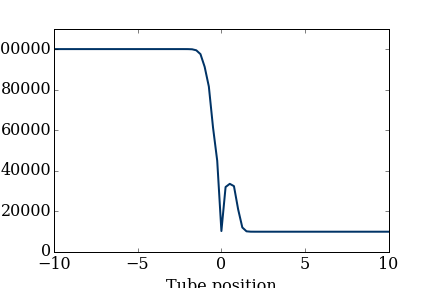
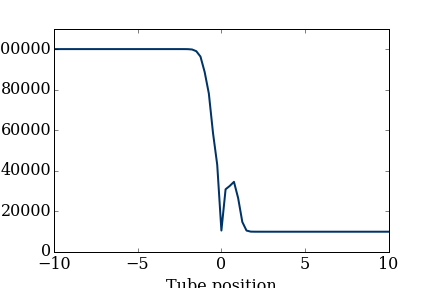
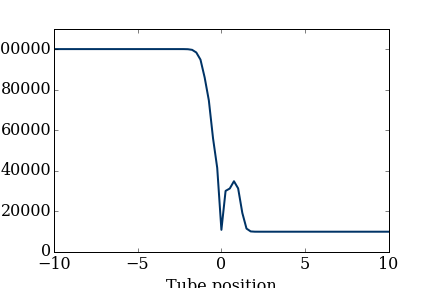
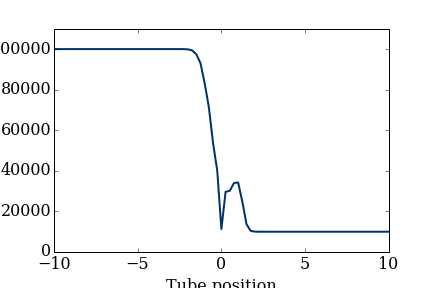
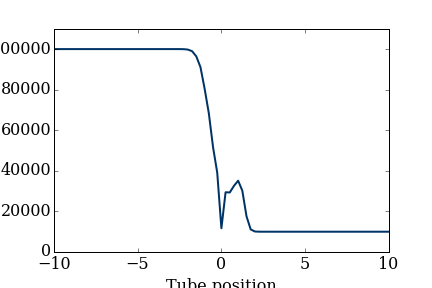
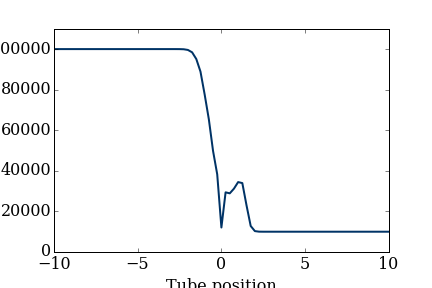
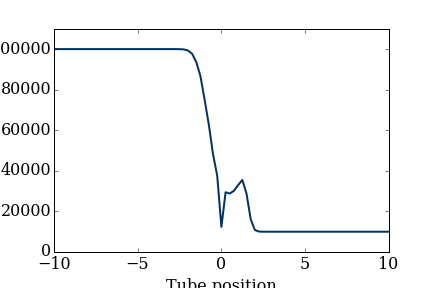
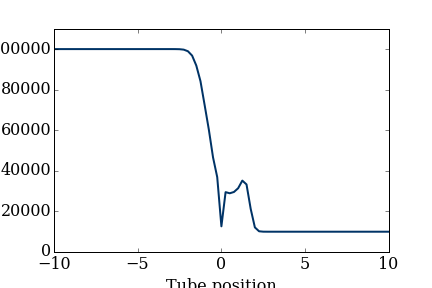
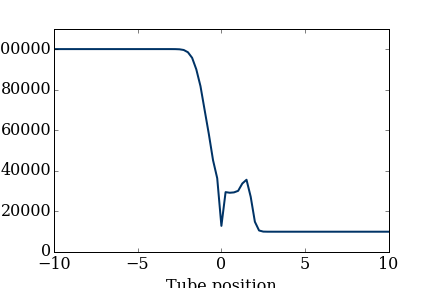
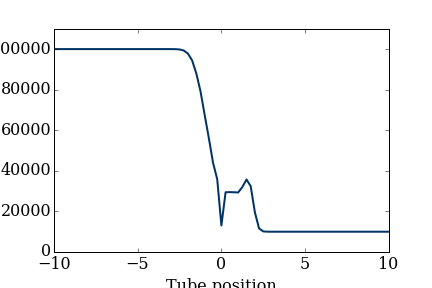
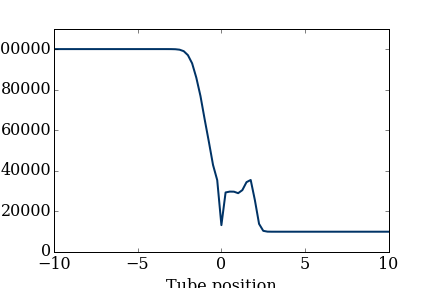
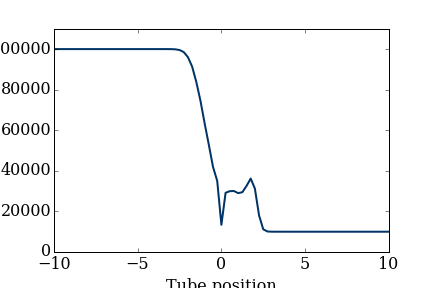
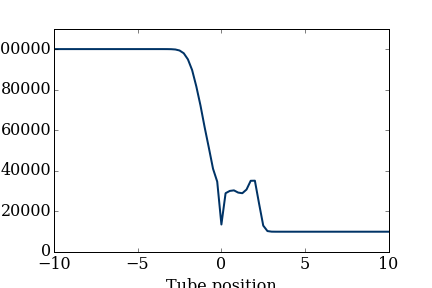
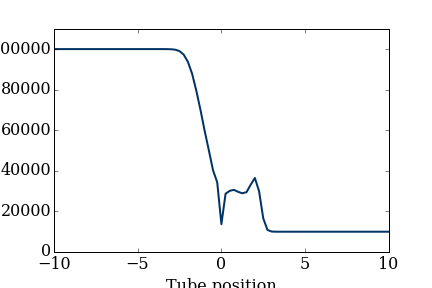
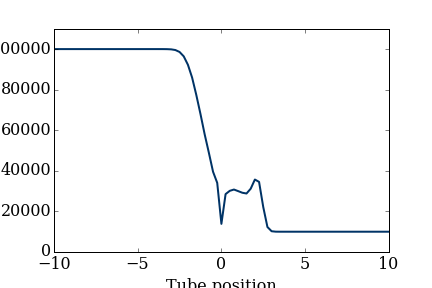
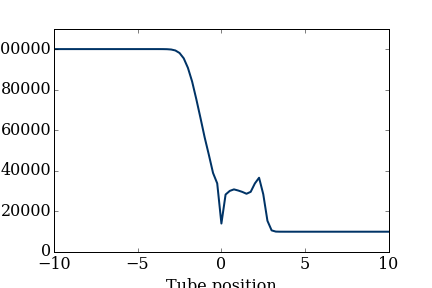
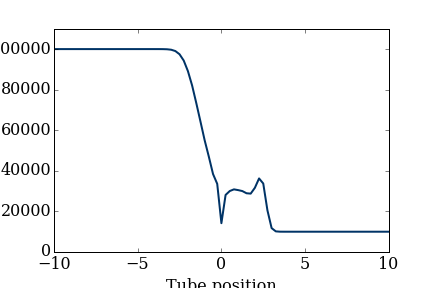
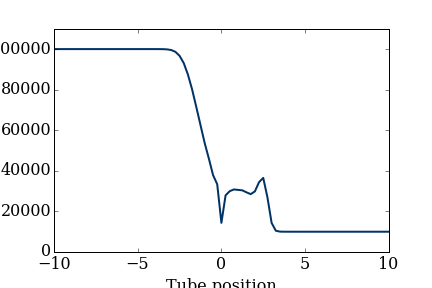
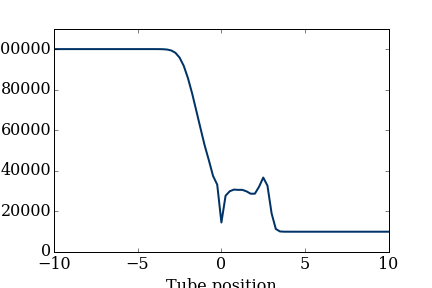
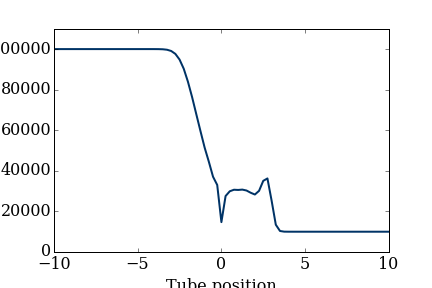
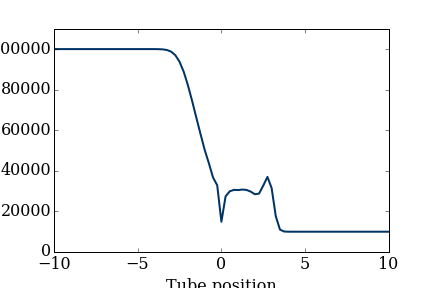
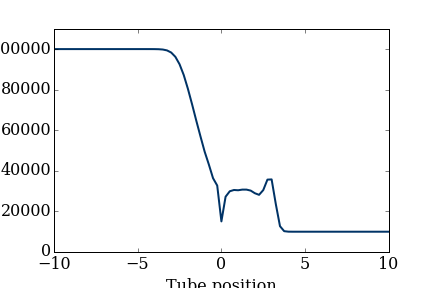
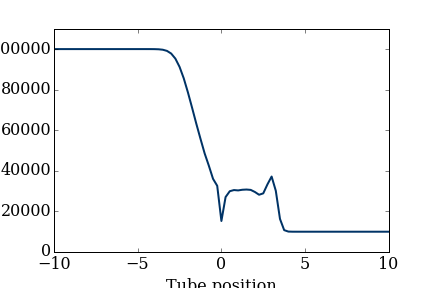
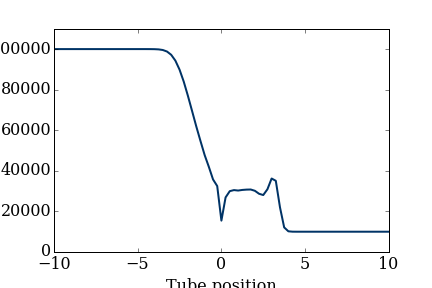
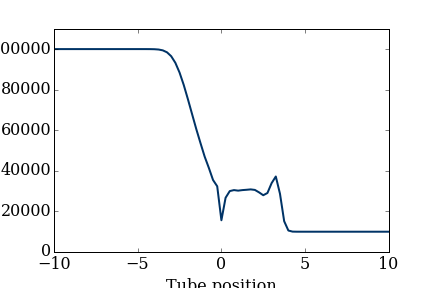
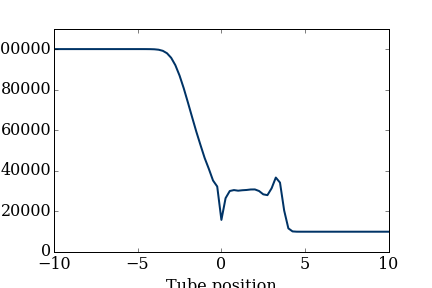
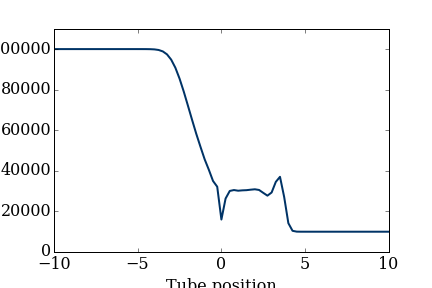
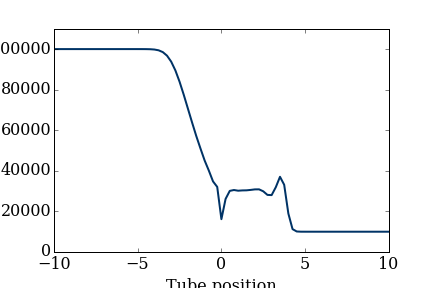
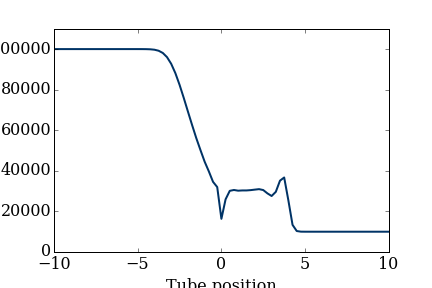
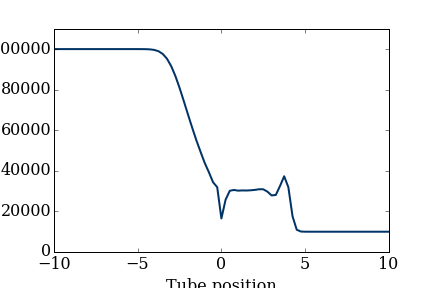
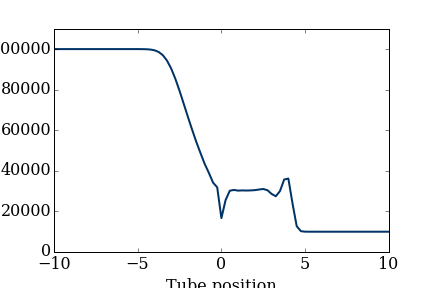
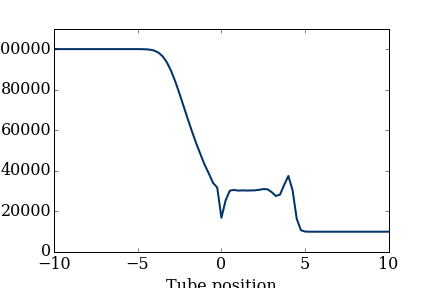
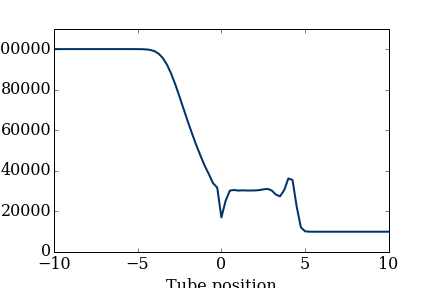
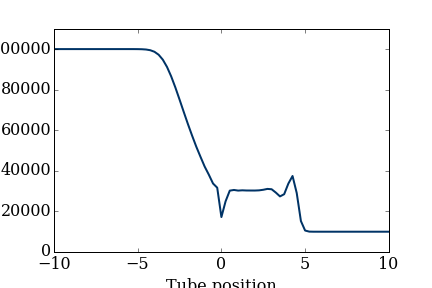
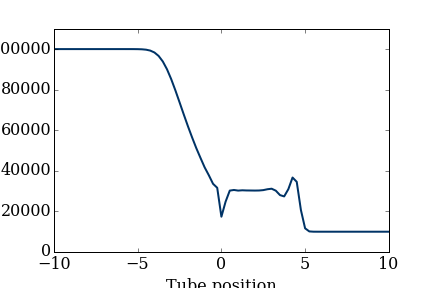
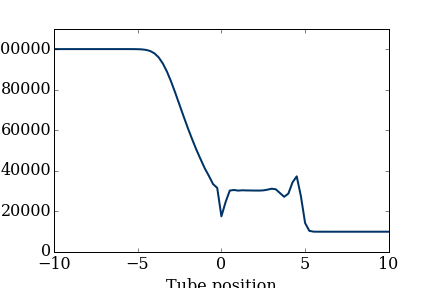
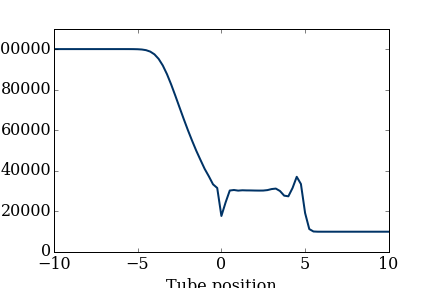
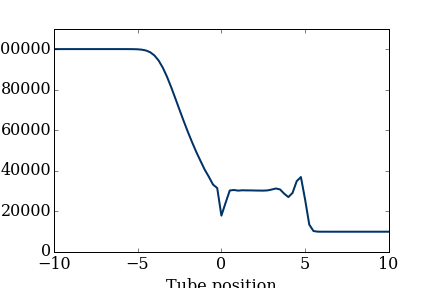
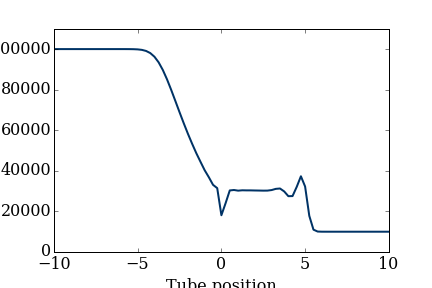
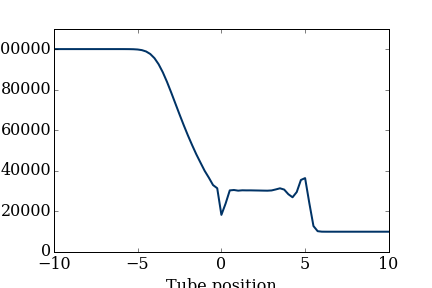

In [19]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(-10,10),ylim=(0,110000),xlabel=('Tube position'),ylabel=('Pressure'));
line, = ax.plot([],[],color='#003366', lw=2);

anim = animation.FuncAnimation(fig, animate, frames=(gamma-1)*(gg[5]-0.5*gg[4]**2/gg[3]), interval=75)
display_animation(anim, default_mode='once')

In [26]:
print ('The pressure at x = 2.5 m is {:.2f} N/m^2.'.format((gamma-1)*(gg[2][50]-gg[1][50]**2/gg[0][50]/2)))

The pressure at x = 2.5 m is 30250.89 N/m^2.
